In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alcohol-consumption/total-alcohol-consumption-per-capita-litres-of-pure- ahcool new.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import plotly.express as px

import pandas as pd

df = pd.read_csv("/kaggle/input/alcohol-consumption/total-alcohol-consumption-per-capita-litres-of-pure- ahcool new.csv")







## **<span style="color:#71369e">INTRODUCTION</span>**


Alcohol consumption is a multifaceted and prevalent aspect of human culture that has been intertwined with social, cultural, and economic dimensions throughout history. The consumption of alcoholic beverages is a global phenomenon, with diverse patterns and trends observed across different societies and demographic groups. From celebratory to social and even therapeutic contexts, alcohol plays various roles in societies worldwide. Understanding the dynamics of alcohol consumption is crucial not only for sociocultural exploration but also for addressing public health concerns associated with excessive or problematic drinking.


#### **<span style="color:#246980">Purpose of the Analysis</span>**


The purpose of this analysis is to delve into the intricate landscape of alcohol consumption, aiming to unravel trends, patterns, and impacts associated with its prevalence. By scrutinizing data and exploring societal behaviors, this analysis seeks to provide insights into how alcohol consumption has evolved over time, identifying key factors influencing its patterns. Furthermore, the examination will extend to the impacts of alcohol consumption on individuals, communities, and public health. By comprehensively understanding these dynamics, we aim to contribute to informed policymaking, public health initiatives, and societal discourse surrounding alcohol use.


#### **<span style="color:#246980">Data Source</span>**

The analysis draws its foundation from meticulously selected data sources, which include surveys, public datasets, and other validated repositories. This strategic approach ensures the reliability, comprehensiveness, and integrity of the information underpinning our analytical insights.

#### **<span style="color:#246980">Examining noteworthy aspects of the dataset</span>**

1. Identify and handle missing values.
2. Eliminate duplicate rows.
3. Validate data types.
4. Confirm numerical data is appropriately formatted.
5. Detect and address outliers.
6. Scrutinize unique values within the dataset.
7. Generate summary statistics.
8. Verify data consistency.



In [3]:
old_column_name = 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)'
new_column_name = 'Alcohol_Consumption'
df.rename(columns={old_column_name: new_column_name}, inplace=True)

old_column_name = 'Entity'
new_column_name = 'Country'
df.rename(columns={old_column_name: new_column_name}, inplace=True)

In [4]:
df.head()

,Country,Code,Year,Alcohol_Consumption
0,Afghanistan,AFG,2010,0.21
1,Afghanistan,AFG,2015,0.21
2,Afghanistan,AFG,2018,0.21
3,Albania,ALB,2000,6.57
4,Albania,ALB,2005,7.65


### **<span style="color:#246980">Top 10 countries with highest alcohol consumers </span>**

In [5]:
# Convert 'Alcohol_Consumption' to numeric (ignore errors, setting non-numeric values to NaN)
df['Alcohol_Consumption'] = pd.to_numeric(df['Alcohol_Consumption'], errors='coerce')

# Assuming the DataFrame has columns 'Entity' and 'Alcohol_Consumption'
# Update the column names accordingly
country_avg = df.groupby('Country')['Alcohol_Consumption'].mean()

# Find the top 10 countries with the highest alcohol consumption
top_10_countries = country_avg.nlargest(10)

# Print or use the top_10_countries DataFrame as needed
print(top_10_countries)


Country
Libya         58.600
Mauritania    31.066
Yemen         21.462
Kuwait        19.000
Somalia       18.056
Pakistan      17.196
Lithuania     14.662
Moldova       14.536
Russia        14.524
Czechia       14.504
Name: Alcohol_Consumption, dtype: float64


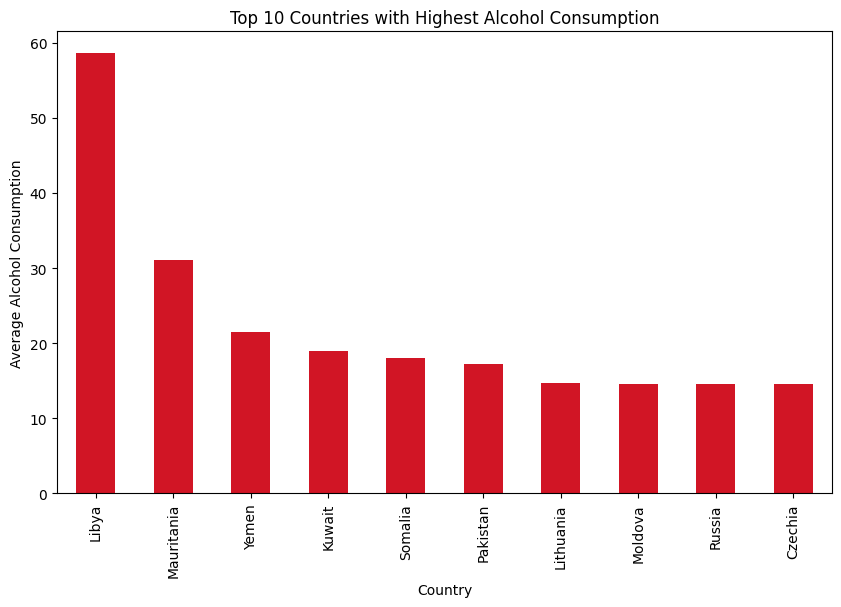

In [6]:
# Find the top 10 countries with the highest alcohol consumption
top_10_countries = country_avg.nlargest(10)

# Plot the top 10 countries
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='#d11525')
plt.title('Top 10 Countries with Highest Alcohol Consumption')
plt.xlabel('Country')
plt.ylabel('Average Alcohol Consumption')
plt.show()


### **<span style="color:#246980">Top 10 countries with Lowest alcohol consumers </span>**

In [7]:
# Find the top 10 countries with the lowest alcohol consumption
bottom_10_countries = country_avg.nsmallest(10)

# Print or use the top_10_countries DataFrame as needed
print(bottom_10_countries)

Country
Saudi Arabia    0.182
Afghanistan     0.210
Egypt           0.332
Brunei          0.378
Niger           0.402
Iraq            0.428
Comoros         0.490
Sudan           0.515
Indonesia       0.548
Jordan          0.660
Name: Alcohol_Consumption, dtype: float64


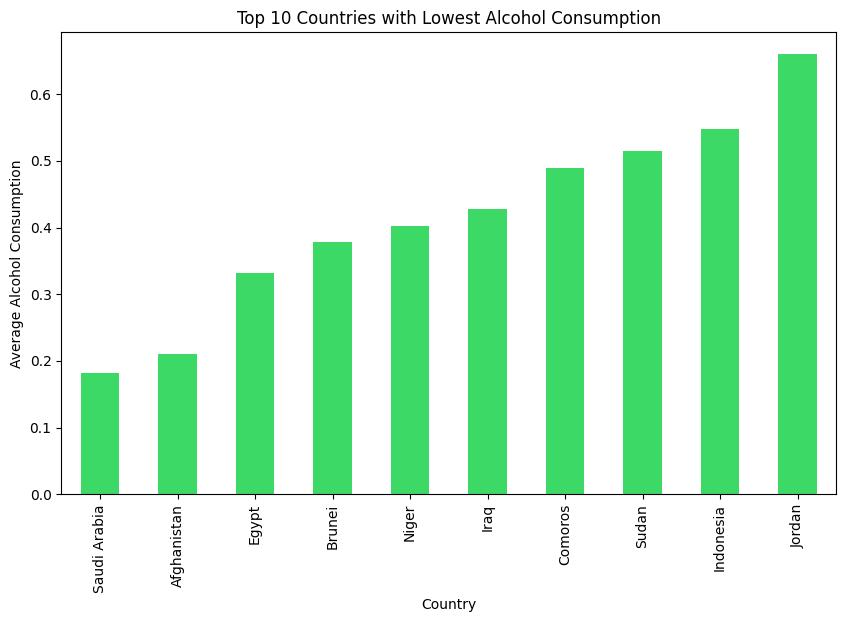

In [8]:
# Find the top 10 countries with the lowest alcohol consumption
bottom_10_countries = country_avg.nsmallest(10)

# Plot the bottom 10 countries
plt.figure(figsize=(10, 6))
bottom_10_countries.plot(kind='bar', color='#3dd966')
plt.title('Top 10 Countries with Lowest Alcohol Consumption')
plt.xlabel('Country')
plt.ylabel('Average Alcohol Consumption')
plt.show()


### **<span style="color:#246980">Comparison of alcohol consumption between different countries</span>**

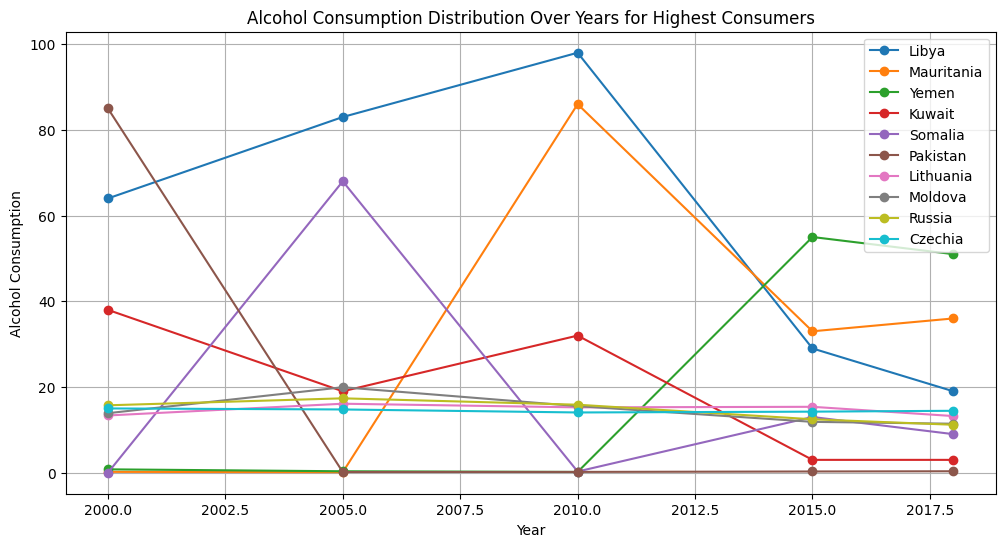

In [9]:

# Update the column names accordingly
top_consumers = df.groupby('Country')['Alcohol_Consumption'].mean().nlargest(10).index
subset_df = df[df['Country'].isin(top_consumers)]

# Plot the alcohol consumption distribution over the years for the highest consumers
plt.figure(figsize=(12, 6))
for country in top_consumers:
    country_data = subset_df[subset_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Alcohol_Consumption'], label=country, marker='o', linestyle='-')

plt.title('Alcohol Consumption Distribution Over Years for Highest Consumers')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption')
plt.legend()
plt.grid(True)
plt.show()


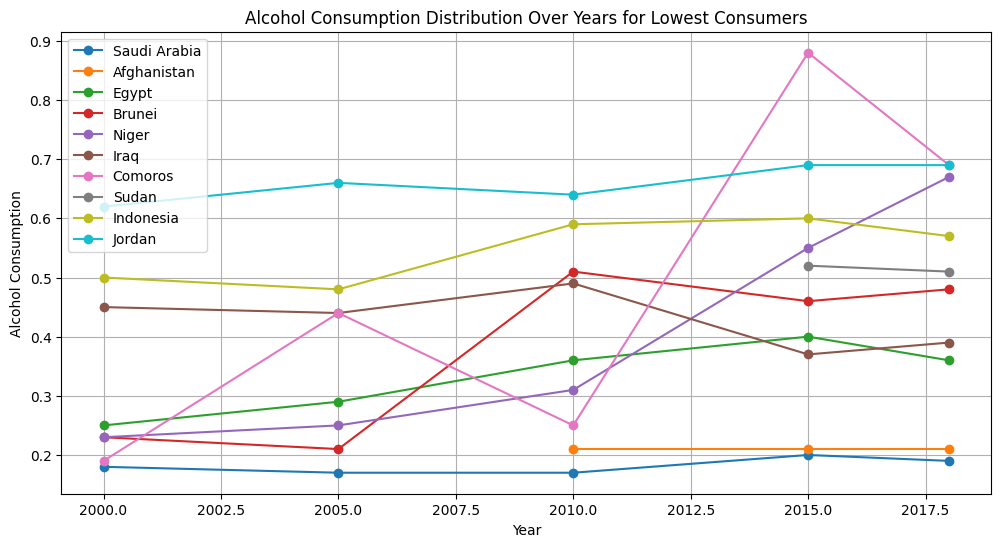

In [10]:
# Update the column names accordingly
bottom_consumers = df.groupby('Country')['Alcohol_Consumption'].mean().nsmallest(10).index
subset_df = df[df['Country'].isin(bottom_consumers)]

# Plot the alcohol consumption distribution over the years for the lowest consumers
plt.figure(figsize=(12, 6))
for country in bottom_consumers:
    country_data = subset_df[subset_df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Alcohol_Consumption'], label=country, marker='o', linestyle='-')

plt.title('Alcohol Consumption Distribution Over Years for Lowest Consumers')
plt.xlabel('Year')
plt.ylabel('Alcohol Consumption')
plt.legend()
plt.grid(True)
plt.show()


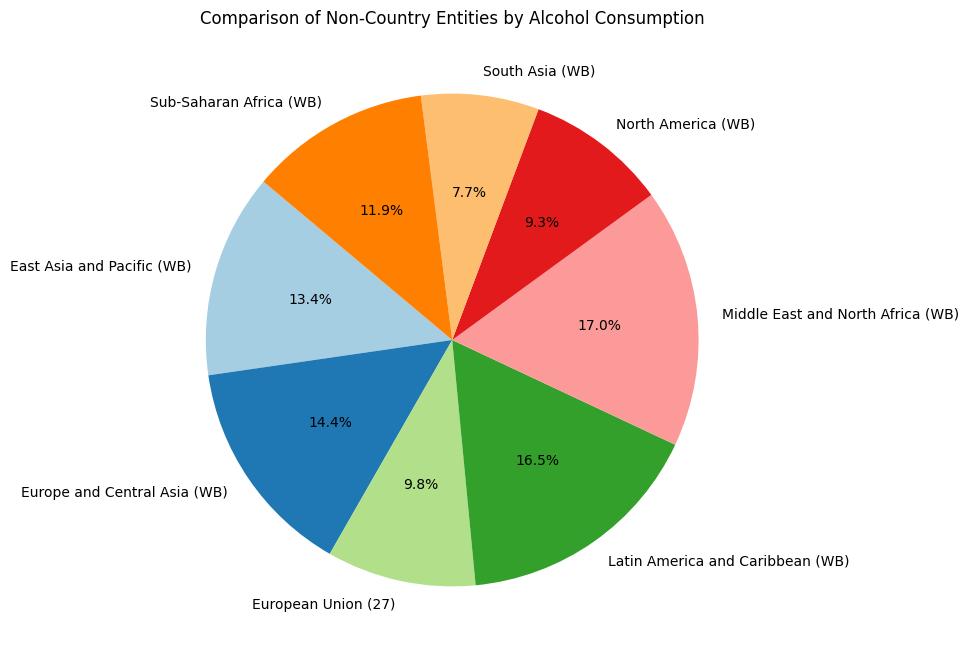

In [11]:
# List of non-country entities
non_country_entities = [
    'East Asia and Pacific (WB)',
    'Europe and Central Asia (WB)',
    'European Union (27)',
    'Latin America and Caribbean (WB)',
    'Middle East and North Africa (WB)',
    'North America (WB)',
    'South Asia (WB)',
    'Sub-Saharan Africa (WB)',
]

# Calculate lengths of entities
entity_lengths = [len(entity) for entity in non_country_entities]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(entity_lengths, labels=non_country_entities, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Comparison of Non-Country Entities by Alcohol Consumption')
plt.show()



#### **<span style="color:#246980">Conclusion</span>**

Based on the analysis of alcohol consumption data, the main discoveries can be summarized as follows:

1. **Top Consumers:** Libya, Mauritania, Yemen, Kuwait, Somalia Pakistan, Lithuania, Moldova, Russia and Czech exhibit the highest per capita alcohol consumption. These countries demonstrate a notable preference for elevated alcohol intake.

2. **Lowest Consumers:** Saudi Arabia, Afghanistan, Egypt, Brunei, Niger, Iraq, Commoros, Sudan, Indonesia and Jordan emerge as the least consumers of alcohol per capita. This pattern highlights the influence of cultural, religious, and potentially legal factors that significantly restrain alcohol consumption in these nations.

3. **Regional Variations:** The analysis suggests distinct regional variations in alcohol consumption patterns, with some regions displaying a higher overall trend compared to others.

4. **Cultural and Legal Influences:** The observed differences in alcohol consumption between countries underscore the impact of cultural practices, religious beliefs, and legal regulations on drinking habits.

5. **Need for Further Investigation:** While the analysis provides valuable insights, further investigation into the socio-economic, demographic, and historical factors could contribute to a more comprehensive understanding of the observed consumption patterns.

These discoveries provide a foundation for understanding the global landscape of alcohol consumption and can be valuable for public health initiatives, policy-making, and targeted interventions in different regions.